<a href="https://colab.research.google.com/github/1uch0/ML_Course_training/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [20]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [34]:
import math

N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0] * d #This is a list of 10m 0s
sums_of_rewards = [0] * d #This is a list of rewards
total_reward = 0

#Start a for loop that will iterate all different rounds up to round 10.000
for n in range (0, N):
  ad = 0
  max_upper_bound = 0 #at the begining the highest upper confidence bound is cero
  for i in range (0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2*math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      #We need to make sure that the enumeraot is different than cero
      upper_bound = 1e400 #Supper high value
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #Increment this particular number by one
  reward =  dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_rewards = total_rewards + reward









## Visualising the results

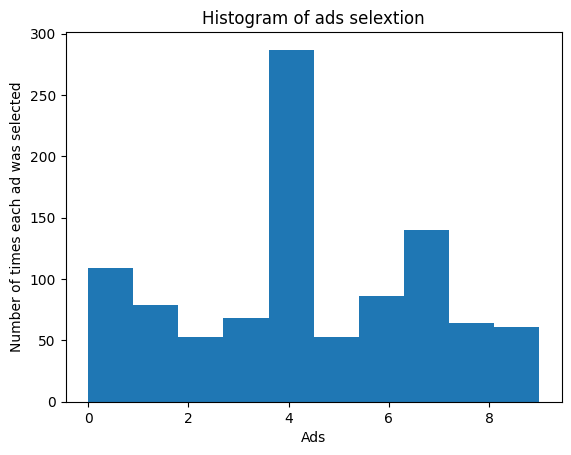

In [35]:
plt.hist(ads_selected)
plt.title('Histogram of ads selextion')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

#Num 4 is the add that has been more attrcted to customers